In [1]:
import sys
from pathlib import Path

# To import functions from parent directory
current_dir = Path(__file__).parent
parent_dir = current_dir.parent.parent
sys.path.append(str(parent_dir))

import pickle, os, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from synthetic_data import *
from optimize import optimize, evaluate

In [15]:
import pickle
fpath = "Results\saved_results_elastic_2023-12-12_23-03-34.pkl"
with open(fpath, 'rb') as file:
    data = pickle.load(file)

In [16]:
params_hist = data[0]
loss_hist = data[1]

params_elastic = params_hist[np.argmin(loss_hist)]

print("--ELASTIC LEARNED PARAMETERS--")
print(f'{"mu":>8}: {params_elastic[0]}')
print(f'{"N":>8}: {params_elastic[2]}')
print(f'    Loss: {min(loss_hist)}')

--ELASTIC LEARNED PARAMETERS--
      mu: 0.2098238640934252
       N: 6.9733342794025805
    Loss: 0.0005316076458065679


In [18]:
%%capture
mat = 'ubbmi'
data_data = [np.loadtxt('elastic.csv', delimiter=','), 
             np.loadtxt('visco1_2.dat'), np.loadtxt('visco2_2.dat')]
data = data_data[0]
stretch = data[:6, 0]
P11 = data[:6, 1]
t = np.linspace(0, 1, len(P11))

true_strain = np.log(stretch)
true_stress = P11*stretch

mdata = [(t, true_strain, true_stress)]

pred_elastic = evaluate(mdata, params_elastic, mat)

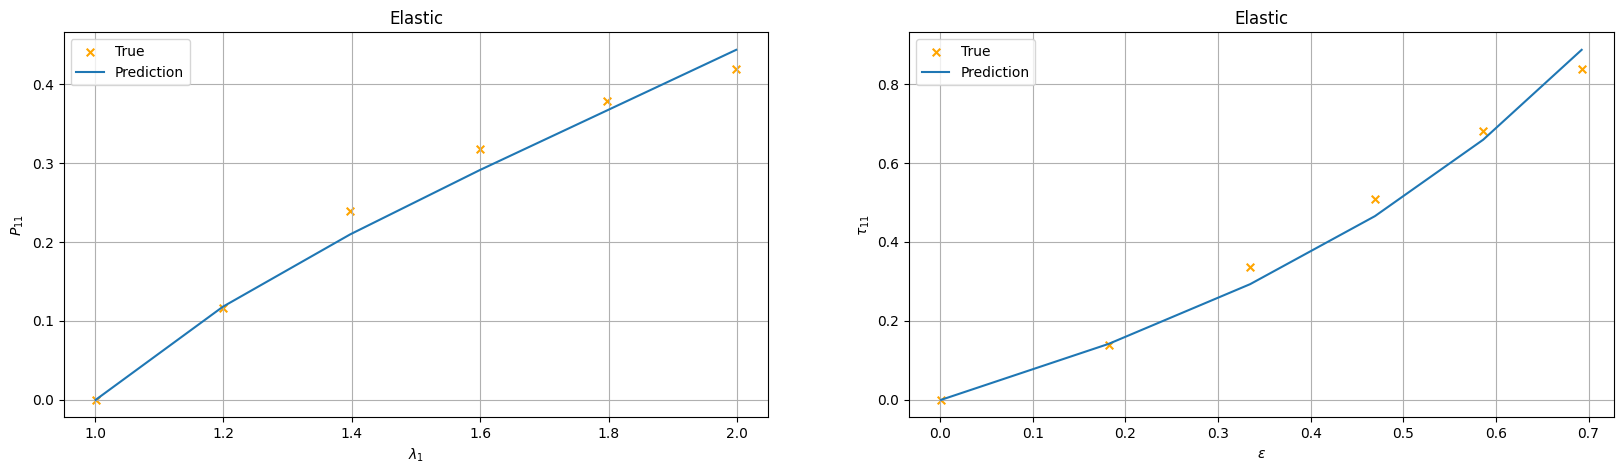

In [26]:
t = mdata[0][0]
x = mdata[0][1]
y = mdata[0][2]
yp = pred_elastic[0][2]

figsize = (20, 5)

plt.figure(figsize=figsize)
plt.subplot(1, 2, 1)
plt.scatter(np.exp(x), y/np.exp(x), marker='x', label='True', s=30, c='orange')
plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
plt.title('Elastic')
plt.xlabel(r'$\lambda_1$')
plt.ylabel(r'$P_{11}$')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(x, y, label='True', marker='x', s=30, c='orange')
plt.plot(x, yp, label='Prediction')
plt.title('Elastic')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$\tau_{11}$')
plt.legend()
plt.grid()

In [32]:
fpath = "Results\saved_results_visco_2023-12-13_00-10-10.pkl"
with open(fpath, 'rb') as file:
    data = pickle.load(file)

In [38]:
params_hist = data[2]
loss_hist = data[3]

params_visco = params_hist[np.argmin(loss_hist)]

coef = 4
params_names = ['mu', 'mu_v', 'N', 'N_v', 'tau_hat'] + [f'a{j}'.format(j=j) for j in range(1, coef+1)]
print("---Learned Parameters---")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_visco[i]}')
print(f'    Loss: {min(loss_hist)}')

---Learned Parameters---
      mu: 0.2098238640934252
    mu_v: 0.35466956390808846
       N: 6.9733342794025805
     N_v: 9.584414992378155
 tau_hat: 2.2261513776668727
      a1: 1e-08
      a2: 1e-08
      a3: 1e-08
      a4: 3.4624613214916096
    Loss: 0.011683512995962977


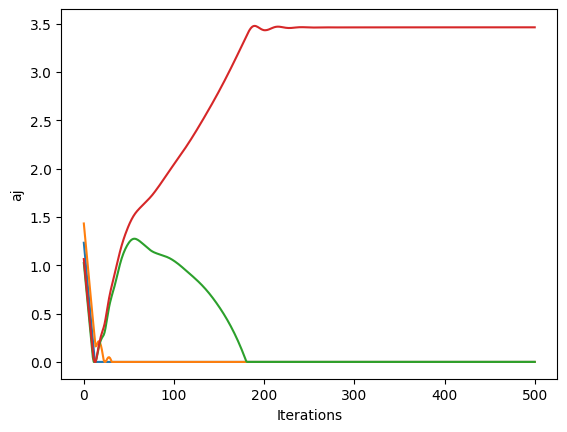

In [40]:
plt.figure()
params_hist = np.array(params_hist)
plt.xlabel('Iterations')
plt.ylabel(r'aj')
plt.plot(params_hist[:, -4:])